In [1]:
!yt-dlp --no-audio -f "bestvideo[ext=mp4]" -o "input/selective_attention_test.mp4" "https://www.youtube.com/watch?v=vJG698U2Mvo"

[youtube] Extracting URL: https://www.youtube.com/watch?v=vJG698U2Mvo
[youtube] vJG698U2Mvo: Downloading webpage
[youtube] vJG698U2Mvo: Downloading ios player API JSON
[youtube] vJG698U2Mvo: Downloading mweb player API JSON
[youtube] vJG698U2Mvo: Downloading m3u8 information
[info] vJG698U2Mvo: Downloading 1 format(s): 397
[download] input/selective_attention_test.mp4 has already been downloaded
[download] 100% of    2.63MiB


In [2]:
# Import display function
from IPython.display import Image, display
from pathlib import Path

# Import providers
from mirk.providers_cv import YOLOProvider
from mirk.providers_vlm import OpenAIVLMProvider

In [3]:
# Initialize CV provider
cv_yolo = YOLOProvider()

# Detect an object in video - get first detection that meets our confidence threshold
# You can use for loop to get all detections that meet our confidence threshold.
try:
    frame_num, confidence = next(
        cv_yolo.detect(
            source="input/selective_attention_test.mp4",
            target_class="person",  # Target class to detect
            conf_threshold=0.8,  # Confidence threshold
        )
    )
    print(f"Found person in frame {frame_num} with confidence {confidence:.2f}")
    # Create output directory if it doesn't exist
    output_dir = Path("output")
    output_dir.mkdir(parents=True, exist_ok=True)
    # Save the detected frame
    cv_yolo.save_frame(
        "input/selective_attention_test.mp4",
        frame_num,
        f"output/detected_person_frame_0.jpg",
    )
except StopIteration:
    print("Target object not found in video")


video 1/1 (frame 1/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 25.2ms
video 1/1 (frame 2/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 22.3ms
video 1/1 (frame 3/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 22.0ms
video 1/1 (frame 4/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 22.0ms
video 1/1 (frame 5/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 20.1ms
video 1/1 (frame 6/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 20.4ms
video 1/1 (frame 7/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640 (no detections), 22.9ms
video 1/1 (frame 8/2447) /Users/dima/Projects/mirk/examples/input/selective_attention_test.mp4: 480x640

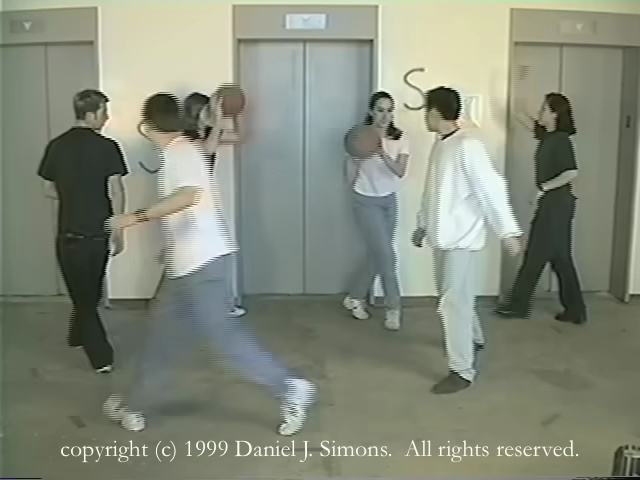

In [4]:
# Display image from file
display(Image(f"output/detected_person_frame_0.jpg"))

In [5]:
# Initialize VLM provider
vlm_openai = OpenAIVLMProvider(model="gpt-4o")

base64_frame = cv_yolo.get_encoded_frame(
    "input/selective_attention_test.mp4", frame_num
)
# Question to ask about the image
question = "What are the people doing in the image?"
# Ask about the saved frame
answer = vlm_openai.ask_about_image(base64_frame, question)
print(f"\nQuestion: {question}")
print(f"Answer: {answer}")


Question: What are the people doing in the image?
Answer: The people in the image are engaged in a basketball passing activity. Some are passing basketballs to each other, while others are walking between them.
